<a href="https://colab.research.google.com/github/Ghostalp07/EDA/blob/main/k_n(lab2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


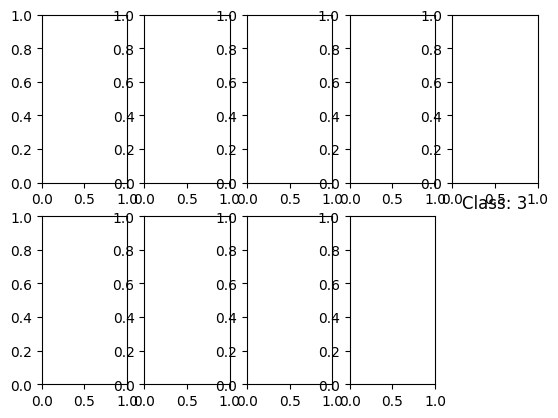

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
for i in range(10):plt.subplot(2,5,i+1)
plt.title(f"Class: {y_train[i][0]}")
plt.axis("off")
plt.show()

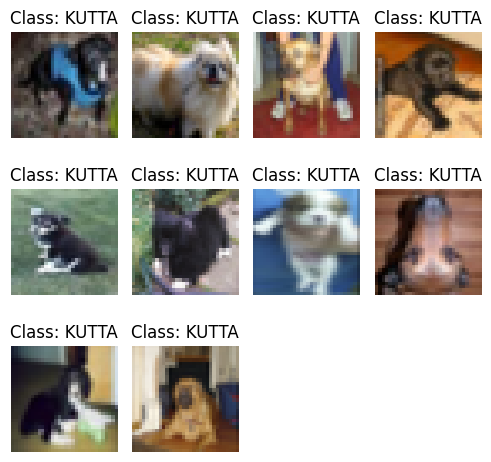

In [ ]:
class_names = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]
dog_indexes = np.where(y_train == 5)[0]


plt.figure(figsize=(5, 5))
for i in range(10):
   plt.subplot(3, 4, i + 1)
   plt.imshow(x_train[dog_indexes[i]])
   plt.title("Class: KUTTA")
   plt.axis("off")

plt.tight_layout()
plt.show()

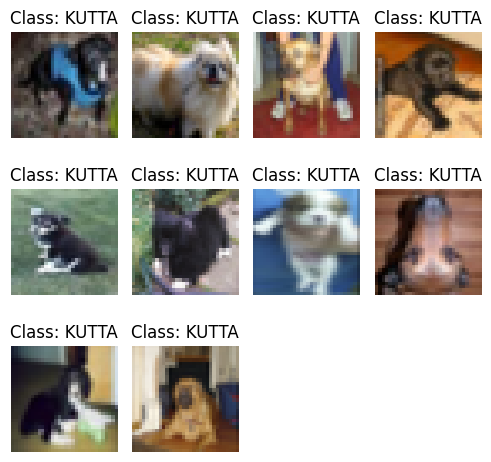

In [ ]:
# RESHping for knn
x_train_flt=(x_train.reshape(x_train.shape[0],-1))
x_test_flt=x_train.reshape(x_test.shape[0],-1)
dog_indexes = np.where(y_train == 5)[0]


plt.figure(figsize=(5, 5))
for i in range(10):
   plt.subplot(3, 4, i + 1)
   plt.imshow(x_train[dog_indexes[i]])
   plt.title("Class: KUTTA")
   plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [ ]:
#Q#2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#knn
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(x_train_flat, y_train.ravel())
#pred and eval
y_pred=knn.predict(x_test_flat[:1000])
print(f"Accuracy: {score:.4f}")

Accuracy: 0.3940


In [ ]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#knn
knn=KNeighborsClassifier(n_neighbors=5,metric='manhattan')
knn.fit(x_train_flat, y_train.ravel())
#pred and eval
y_pred=knn.predict(x_test_flat[:1000])
score = accuracy_score(y_test[:1000],y_pred)
print(f"Accuracy: {score:.4f}")

Accuracy: 0.3940


Accuracy with k=1: 0.2680
Accuracy with k=5: 0.2660
Accuracy with k=7: 0.2740
est k: 7 acc of: 0.2740


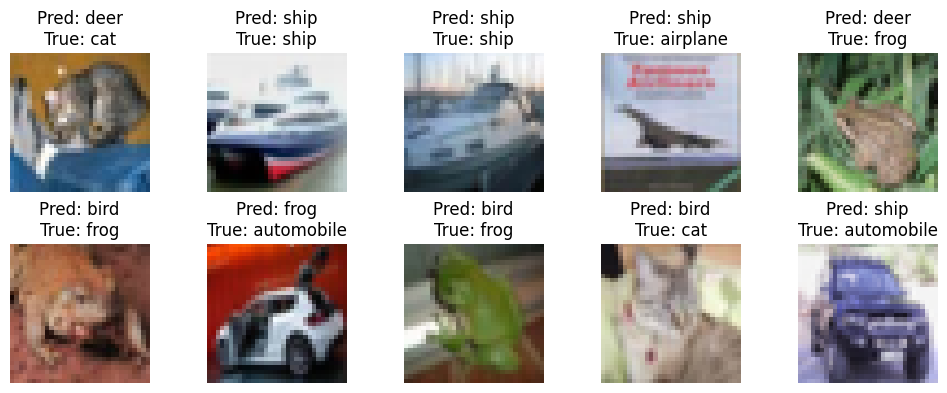

In [ ]:
#q1
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

def evaluate_knn_k_values(X_train, y_train, X_test, y_test, k_values=[1, 5, 7]):
    best_k = None
    best_accuracy = 0.0
    best_model = None
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy with k={k}: {accuracy:.4f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_model = knn

    print(f"\best k: {best_k} acc of: {best_accuracy:.4f}")
    return best_k, best_model

#eval
best_k, best_model = evaluate_knn_k_values(x_train_flat, y_train, x_test_flat, y_test)

y_pred = best_model.predict(x_test_flat)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[y_pred[i]]}\nTrue: {class_names[y_test[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Q#3
subset_size = int(0.10 * x_train_flat.shape[0])
x_train_small = x_train_flat[:subset_size]
y_train_small = y_train[:subset_size]
#eval
best_k, best_model = evaluate_knn_k_values(x_train_small, y_train_small, x_test_flat, y_test)
accuracy_score = accuracy_score(y_test, y_pred)
print(f"10% training data{accuracy_score:.4f}")

Accuracy with k=1: 0.2240
Accuracy with k=5: 0.1990
Accuracy with k=7: 0.1990
est k: 1 acc of: 0.2240
10% training data0.2660


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train_flat, y_train.ravel())

# Predict and evaluate
y_pred = knn.predict(x_test_flat[:1000])  # Predicting for a subset to save time
accuracy = accuracy_score(y_test[:1000], y_pred)
print(f"Accuracy with k=3: {accuracy * 100:.2f}%")

Accuracy with k=3: 33.10%


In [ ]:
import numpy as np

# Example data and weights
np.random.seed(0)
X = np.random.randn(5, 3)  # 5 samples, 3 features
W = np.random.randn(3, 3)  # 3 classes, 3 features
y = np.array([0, 1, 2, 1, 0])  # True labels

# Softmax Loss Function
def softmax_loss(X, W, y):
    scores = np.dot(X, W)
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    correct_log_probs = -np.log(probs[range(len(y)), y])

    loss = np.sum(correct_log_probs) / len(y)

    return loss, probs

# SVM Loss Function
def svm_loss(X, W, y, delta=1.0):
    scores = np.dot(X, W)

    correct_class_scores = scores[range(len(y)), y][:, np.newaxis]

    margins = np.maximum(0, scores - correct_class_scores + delta)

    margins[range(len(y)), y] = 0

    loss = np.sum(margins) / len(y)

    return loss, margins

# Calculate losses

# Calculate losses
softmax_loss_value, _ = softmax_loss(X, W, y)

svm_loss_value, _ = svm_loss(X, W, y)
print("Softmax Loss:", softmax_loss_value)
print("SVM Loss:", svm_loss_value)

Softmax Loss: 1.1837737663068069
SVM Loss: 1.7834001658947396


In [ ]:
def regularization_loss(W, l1_lambda=0.01, l2_lambda=0.01):

    l1_loss = l1_lambda * np.sum(np.abs(W))

    l2_loss = l2_lambda * np.sum(W ** 2)

    total_loss = l1_loss + l2_loss

    return total_loss

# Calculate losses with regularization

l1_lambda = 0.01

l2_lambda = 0.01

total_regularization_loss = regularization_loss(W, l1_lambda, l2_lambda)
print("L1 and L2 Regularization Loss:", total_regularization_loss)

L1 and L2 Regularization Loss: 0.194695095277601


In [ ]:
# Numerical Gradient
# Remove the duplicate function definition and fix the indentation
def numerical_gradient(X, W, y, loss_func, epsilon=1e-5):

    grad = np.zeros_like(W)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            old_val = W[i, j]
            W[i, j] = old_val + epsilon
            pos_loss, _ = loss_func(X, W, y)
            W[i, j] = old_val - epsilon
            neg_loss, _ = loss_func(X, W, y)
            grad[i, j] = (pos_loss - neg_loss) / (2 * epsilon)
            W[i, j] = old_val  # Reset to original
    return grad

# Analytical Gradient for Softmax Loss
def softmax_grad(X, W, y):

    scores = np.dot(X, W)

    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))

    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    probs[range(len(y)), y] -= 1

    dW = np.dot(X.T, probs) / len(y)

    return dW

# Compute gradient
num_grad = numerical_gradient(X, W, y, softmax_loss)
analytical_grad = softmax_grad(X, W, y)
print("Numerical Gradient:\n", num_grad)
print("Analytical Gradient:\n", analytical_grad)



Numerical Gradient:
 [[-0.15000095  0.28824211 -0.13824116]
 [ 0.08474469 -0.11291779  0.0281731 ]
 [-0.22271617  0.19239456  0.03032162]]
Analytical Gradient:
 [[-0.15000095  0.28824211 -0.13824116]
 [ 0.08474469 -0.11291779  0.0281731 ]
 [-0.22271617  0.19239456  0.03032162]]
